# CHAPTER 27: Mean-Square-error Inference

### This code runs Example 2 and plots Figure 1 in the chapter from Chapter 27: Mean-Square-Error Inference (vol II)

TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

## Predicting a crime statistic
The US Federal Bureau of Investigation (FBI) publishes statistics on the crime rates in the country on an annual basis. Figure $27.1$ plots the burglary rates per 100,000 inhabitants for the period 1997--2016.  Assume we model the annual burglary rate as a random variable $\mathcal{x}$ with some mean $\bar{x}$. By examining the plot, we find that this assumption is more or less reasonable only over the shorter range 2000--2009 during which the burglary rate remained practically flat with fluctuations around some nominal average value. The rates are declining before 2000 and after 2010. Assume we did not know the burglary rate for the year 2010 and wanted to predict its value from the burglary rates observed in prior years.  In this example, the  probability distribution of $\mathcal{x}$ is not known to evaluate its mean $\bar{x}$. Instead, we have access to measurements for the years 1997--2015. We can use the data from the years 2000--2009 to compute a sample mean and use it to predict $x(2010)$:
$$
    \widehat{x}(2010)=\frac{1}{10}\sum_{n=2000}^{2009} x(n)\approx  732.6
$$

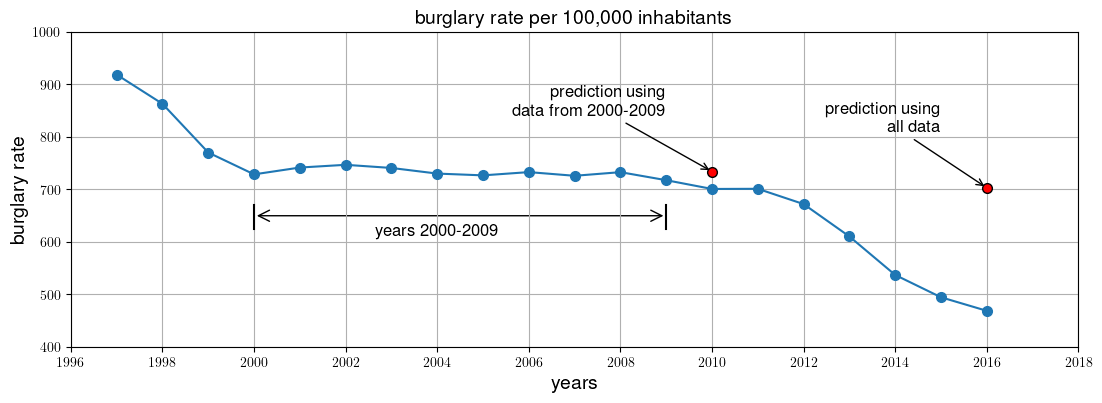

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

X = np.load('FBIdata.npy')     # a table is loaded into a variable X
H = np.array([X[:,0].astype(int), X[:,9]])  # column 0 is years, and column 9 is burglary rate

#figure 1 (crime statistic)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13,9
fig = plt.figure()

# subplot-1
ax = fig.add_subplot(211)
ax.plot(H[0,:],H[1,:],'-o', markersize=7)
ax.set_xlabel(r'years', fontsize=14)
ax.set_ylabel(r'burglary rate', fontsize=14)
ax.set_ylim([400, 1000])
ax.set_xlim([1996, 2018])
plt.xticks(np.arange(min(H[0,:])-1, max(H[0,:])+4, 2))
ax.grid()
ax.set_title(r'burglary rate per 100,000 inhabitants', fontsize=14)

N = np.max(H.shape)

ax.plot(H[0,N-1], np.mean(H[1,0:N]),'-ro', markersize=7, markeredgecolor='black'); # mean of years 1997-2015
ax.plot(H[0,13], np.mean(H[1,3:12]),'-ro', markersize=7, markeredgecolor='black'); # mean of years 2000-2009

# Add some annotations to the plot
plt.annotate('prediction using \n all data', xy= (H[0,N-1], np.mean(H[1,0:N])), xytext= (H[0,N-1]-1, np.mean(H[1,0:N])+100), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold',ha='right', va='bottom')
plt.annotate('prediction using \n data from 2000-2009', xy= (H[0,13], np.mean(H[1,3:12])), xytext= (H[0,13]-1, np.mean(H[1,3:12])+100), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold',ha='right', va='bottom')
arrow = FancyArrowPatch((2000,650), (2009,650), arrowstyle='<->', mutation_scale=20, color='black') # Draw the arrow to highlight the years between 2000-2009
ax.add_patch(arrow)
ax.axvline(2000, color='black', linestyle='-', ymin=0.375, ymax=0.45) # Draw the vertical lines at start and end points
ax.axvline(2009, color='black', linestyle='-', ymin=0.375, ymax=0.45)
ax.text(2004, 610, 'years 2000-2009', ha='center', fontsize=12)

plt.show()

The value $732.6$  is close enough to the actual burglary rate observed for 2010, which is $701$. If we were instead to predict the burglary rate for the year 2016 by using the data for the entire  period 1997--2015, we would end up with 
$$ \widehat{x}(2016)\approx 715.5
$$
which is clearly a bad estimate since the actual value is $468.9$.
 
This example illustrates the fact that we will often be dealing with distributions that vary (i.e., drift) over time for various reasons, such as changing environmental conditions or, in the case of this example, crime deterrence policies that may have been put in place.  This possibility necessitates the development of inference  techniques that are able to adapt to variations in the statistical properties of the data in an $ \textit{automated}$ manner. In this example, the statistical properties of the data during the period 2000--2009 are clearly different from the periods before 2000 and after 2009. 